# Long Short Term Memory(LSTM) based - Stock predicition - - # CPU based


Aim -to predict the Closing_Price_Prediction using past 60 day stock price.

In [0]:
data=df.filter(['Open'])

#Convert to np array
dataset=data.values

#Get the number of rows to train the model on
#math.ceil to round up 

training_data_len = math.ceil(len(dataset)*.8)


#print(dataset)
training_data_len

3704

In [1]:
import math
import numpy as np
import pandas as pd
import pandas_datareader as web
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

#plt.style.use('fivethirtyeight')
#plt.style.use('fivethirtyeight')
plt.style.use('seaborn')


/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


## Data prep

Works on Yahoo based data. (Doesnt contain Indian stock values) 

In [0]:
ticker = 'AMZN'  #amazon  start=   end = current date

In [0]:
ticker = 'TSLA'  #Tesla start=   end = current date

In [0]:
ticker = 'UBER'  #Uber start=   end = current date

In [0]:
ticker = 'TSLA'  #Tesla start=   end = current date

Change start and end date for collection, as per Company.  (Start date cant be before the company was founded.)

Different approaches can be used for Date collection - 


1.   Pretrain on 20+ year dataset, finetune for local
2.   Event specific timings - As in 2020, covid may lead to a new stock trading pattern.



In [6]:
#Get stock quote - we import just the opening and closing Prices of stock, over 20 years duration

df=web.DataReader(ticker, data_source='yahoo', start='2012-01-01', end='2020-05-24')    #YYYY-MM-DD
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,179.479996,175.550003,175.889999,179.029999,5110800,179.029999
2012-01-04,180.500000,176.070007,179.210007,177.509995,4205200,177.509995
2012-01-05,178.250000,174.050003,175.940002,177.610001,3809100,177.610001
2012-01-06,184.649994,177.500000,178.070007,182.610001,7008400,182.610001
2012-01-09,184.369995,177.000000,182.759995,178.559998,5056900,178.559998
...,...,...,...,...,...,...
2020-05-18,2433.000000,2384.010010,2404.350098,2426.260010,4366600,2426.260010
2020-05-19,2485.000000,2428.969971,2429.830078,2449.330078,4320500,2449.330078
2020-05-20,2500.010010,2467.270020,2477.870117,2497.939941,3998100,2497.939941


In [0]:
df.shape

(4630, 6)

In [0]:
#choose plotting style

#plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
#plt.style.use('ggplot')
#plt.style.use('seaborn-whitegrid')
#plt.style.use('bmh')
#plt.style.use('seaborn')

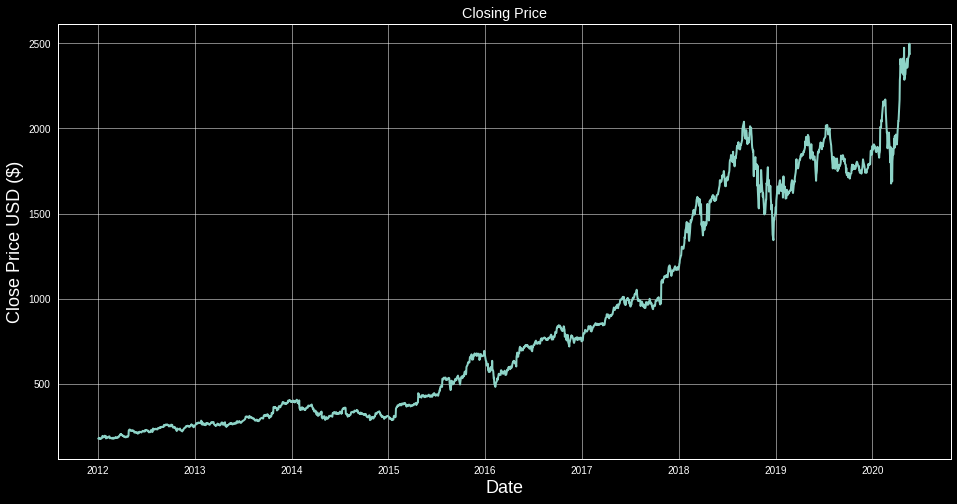

In [19]:
plt.figure(figsize=(16,8))
plt.title('Closing Price')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [20]:
data=df.filter(['Close'])

#Convert to np array
dataset=data.values

#Get the number of rows to train the model on
#math.ceil to round up 

training_data_len = math.ceil(len(dataset)*.8)


#print(dataset)
training_data_len

1689

In [21]:
#Scale the data

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[1.33505289e-03],
       [6.80445763e-04],
       [7.23514529e-04],
       ...,
       [1.00000000e+00],
       [9.77950159e-01],
       [9.73703791e-01]])

In [22]:
#Create training dataset
#Create scaled training dataset

train_data = scaled_data[0:training_data_len,:]

#Split the data into x_train and y_train data set

x_train=[]
y_train=[]

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.00133505, 0.00068045, 0.00072351, 0.00287682, 0.00113264,
       0.00146856, 0.00127906, 0.        , 0.00107235, 0.00246769,
       0.00581824, 0.00797585, 0.00645992, 0.00437552, 0.00476742,
       0.00511196, 0.00748921, 0.00837206, 0.00698533, 0.00797155,
       0.00152024, 0.00249353, 0.00506027, 0.00310507, 0.00355727,
       0.00411282, 0.00389749, 0.00413866, 0.00674416, 0.00661927,
       0.00367785, 0.00172265, 0.00282945, 0.00272609, 0.00200258,
       0.00127476, 0.00137812, 0.00111972, 0.00338931, 0.00161929,
       0.00177002, 0.00145133, 0.00186476, 0.00222221, 0.00337639,
       0.00504305, 0.00361326, 0.00321274, 0.00372953, 0.00272609,
       0.00366062, 0.00392764, 0.00413005, 0.00706285, 0.00680445,
       0.00709299, 0.00822994, 0.01160202, 0.01270882, 0.01086559])]
[0.012351371685659987]



In [0]:
#convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [24]:
#Reshape the data into 3 dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1629, 60, 1)

## Model training 

In [0]:
#Build LSTM model
model=Sequential()
#Add first layer to model
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
#Add second layer to model
model.add(LSTM(50, return_sequences=False))
#Add Dense Layer to model with 25 neurons
model.add(Dense(25))
#Add Dense Layer to model with 1 neuron
model.add(Dense(1))

In [0]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [27]:
#Train the model
model.fit(x_train, y_train, batch_size=1,epochs=3 )

Epoch 1/3
1629/1629 [==============================] - 62s 38ms/step - loss: 8.5361e-04
Epoch 2/3
1629/1629 [==============================] - 60s 37ms/step - loss: 4.1631e-04
Epoch 3/3
1629/1629 [==============================] - 61s 38ms/step - loss: 3.4475e-04


## Testing and Validating model

In [0]:
#Create the test data set
#Create a new array containing scaled values

test_data=scaled_data[training_data_len-60: , : ]
#Create the data sets x_test and y_test

x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])
    


In [0]:
#Convert the data to a numpy array

x_test=np.array(x_test)


In [0]:
#Reshape the data to 3d
x_test=np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))


In [0]:
#Get the models predicted price values

predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)


In [32]:
#Get root mean squared error(RMSE)

rmse =np.sqrt(np.mean(predictions-y_test)**2)
rmse



19.886305967213417

In [0]:
#choose plotting style

#plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
#plt.style.use('ggplot')
#plt.style.use('seaborn-whitegrid')
#plt.style.use('bmh')
#plt.style.use('seaborn')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


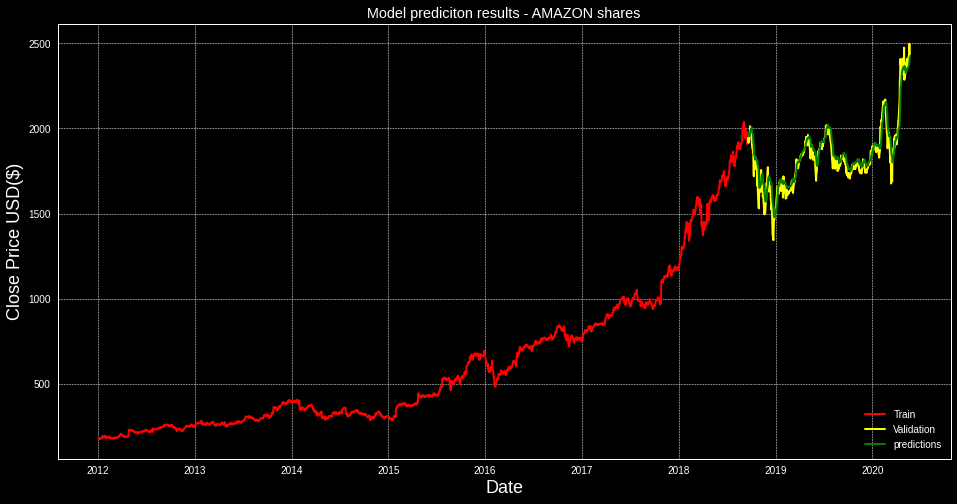

In [48]:
#plot the data

train=data[:training_data_len]
valid=data[training_data_len:]
valid['predictions'] = predictions

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model prediciton results - AMAZON shares')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.plot(train['Close'] , color='red')
plt.plot(valid['Close'] , color='yellow')
plt.plot(valid[ 'predictions'] , color='green')
plt.legend(['Train','Validation', 'predictions'], loc='lower right')
plt.savefig('/content/prediction.png')
plt.show()

In [49]:
#Show the valid and predicted prices

valid.tail(15)

,Close,predictions
Date,,
2020-05-04,2315.989990,2353.478760
2020-05-05,2317.800049,2339.276611
2020-05-06,2351.260010,2327.780029
2020-05-07,2367.610107,2326.094238
2020-05-08,2379.610107,2330.867188
2020-05-11,2409.000000,2339.045166
2020-05-12,2356.949951,2352.319580
2020-05-13,2367.919922,2354.082520
2020-05-14,2388.850098,2354.481934


# Getting predicitions - for tomorrow

In [50]:
#Get the quote
stock_quote = web.DataReader(ticker, data_source='yahoo', start='2012-01-01', end='2020-05-25')

new_df=stock_quote.filter(['Close'])
#Get last 60 days values and convert into array
last_60_days=new_df[-60:].values

#Scale the data to be values between 0
last_60_days_scaled=scaler.transform(last_60_days)

#Create an empty list
X_test=[]
#Appemd the past 60days
X_test.append(last_60_days_scaled)

#Conver the X_test data into numpy array
X_test = np.array(X_test)

#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
#Get predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price=scaler.inverse_transform(pred_price)
print(f'Price of {ticker} tomorrow:{pred_price}')

Price of AMZN tomorrow:[[2421.2363]]


## Getting predicitions for 2 months from now ?

In [0]:
#Get the quote
stock_quote = web.DataReader(ticker, data_source='yahoo', start='2012-01-01', end='2020-05-24')

new_df=stock_quote.filter(['Open'])
#Get last 60 days values and convert into array
last_60_days=new_df[-60:].values

#Scale the data to be values between 0
last_60_days_scaled=scaler.transform(last_60_days)

#Create an empty list
X_test=[]
#Appemd the past 60days
X_test.append(last_60_days_scaled)

#Conver the X_test data into numpy array
X_test = np.array(X_test)

#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
#Get predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price=scaler.inverse_transform(pred_price)
print(f'Opening Price of {ticker} tomorrow:{pred_price}')